In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from sklearn.metrics import recall_score

In [2]:
df = pd.read_csv('heartdisease.csv')
print(df.shape)
df.head()

(4238, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
print(df.isna().mean().round(4)*100)
df = df.dropna()
print("\nAfter dropping nan\n")
print(df.isna().mean().round(4)*100)
df.reset_index(inplace = True,drop = True)
df.tail()

male               0.00
age                0.00
education          2.48
currentSmoker      0.00
cigsPerDay         0.68
BPMeds             1.25
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            1.18
sysBP              0.00
diaBP              0.00
BMI                0.45
heartRate          0.02
glucose            9.16
TenYearCHD         0.00
dtype: float64

After dropping nan

male               0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3651,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
3652,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
3653,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
3654,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
3655,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [4]:
print(df.dtypes)

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [5]:
DfY = df.T[15:16]
DfY = DfY.T
for i in range(5):
    exec(f'DfX{i+1} = df.T[3*i:3*i+3]')
    exec(f'DfX{i+1} = DfX{i+1}.T')
    exec(f'DfX{i+1} = pd.concat([DfX{i+1},DfY], axis = 1)')

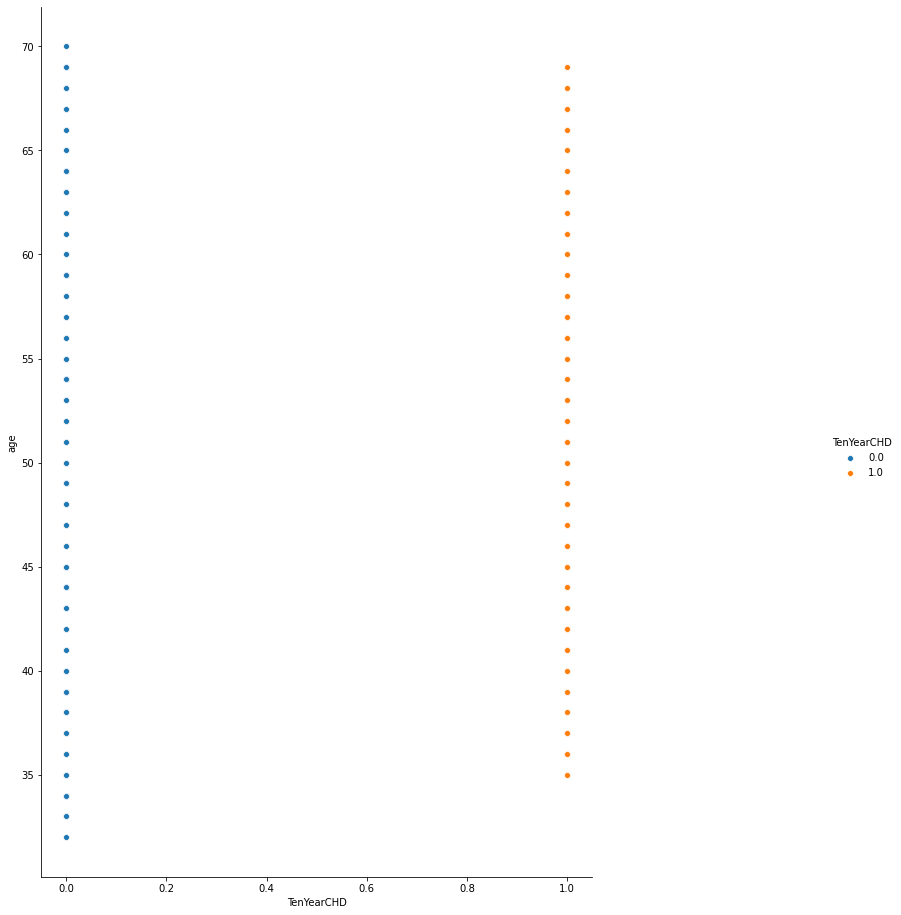

In [6]:
g = sns.pairplot(DfX1, y_vars = 'age',x_vars ='TenYearCHD', hue = 'TenYearCHD')
g.fig.set_size_inches(15,15)

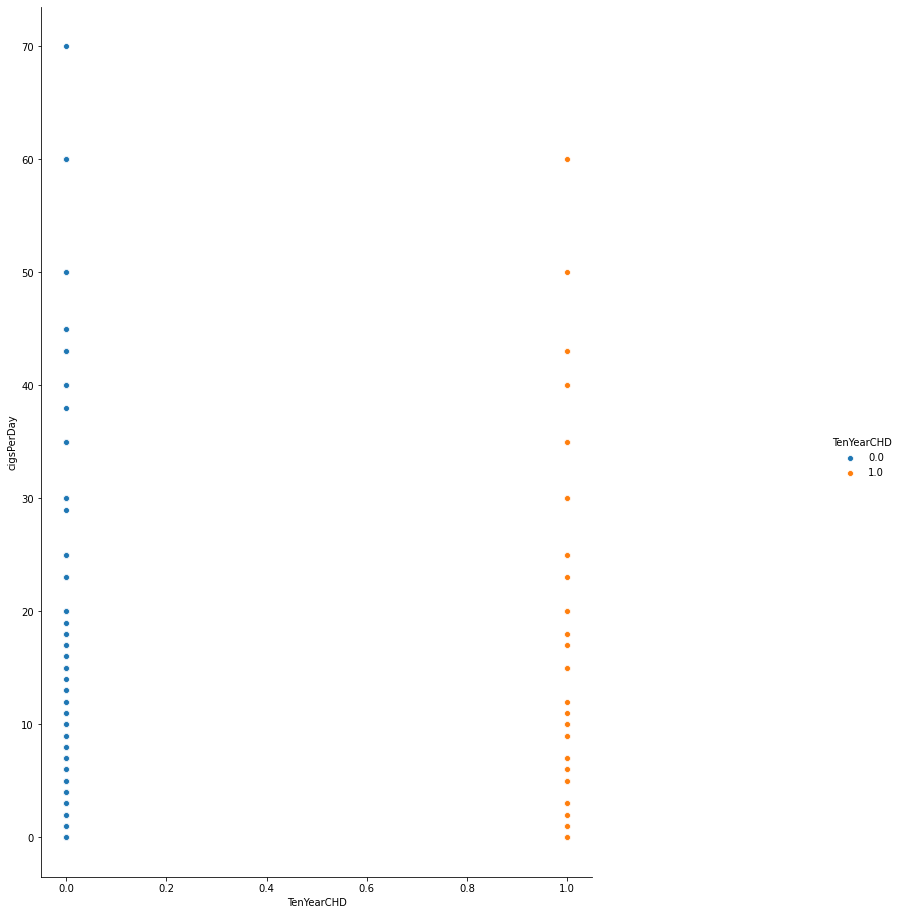

In [7]:
g = sns.pairplot(DfX2, y_vars = 'cigsPerDay',x_vars ='TenYearCHD', hue = 'TenYearCHD')
g.fig.set_size_inches(15,15)

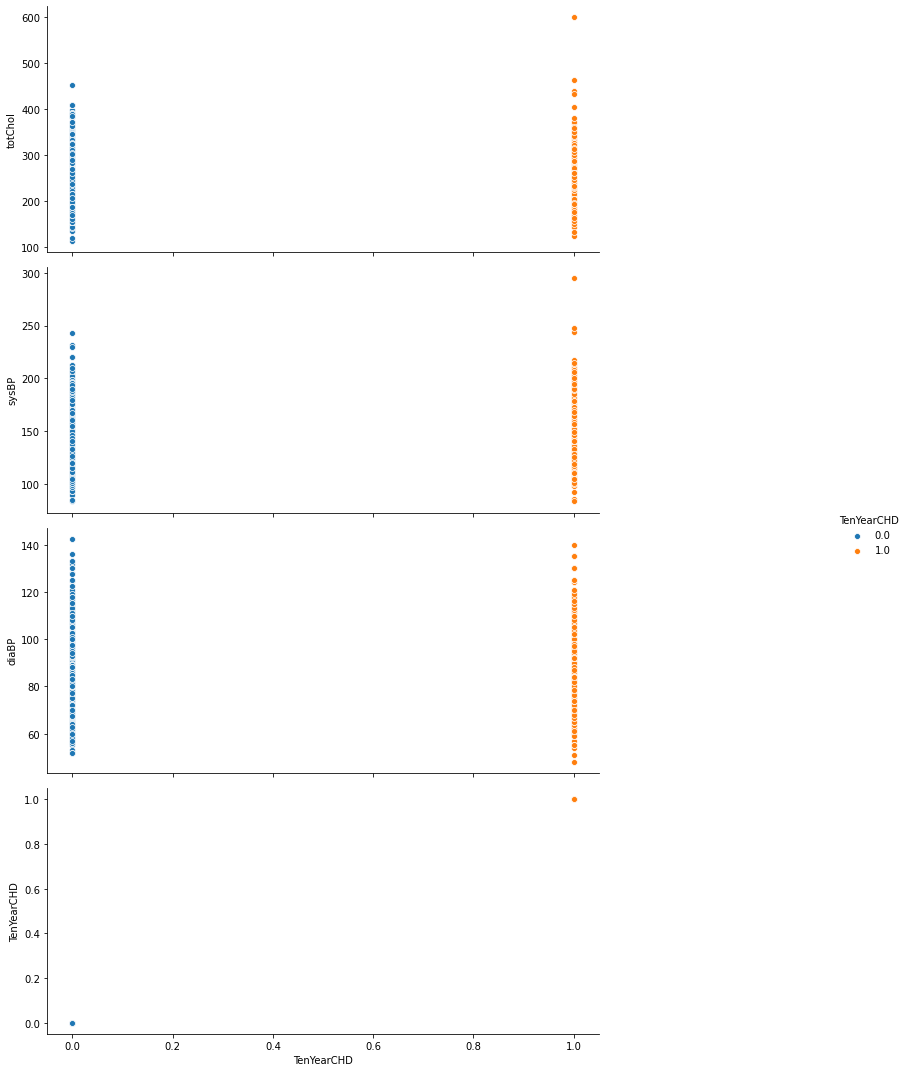

In [8]:
g = sns.pairplot(DfX4, y_vars = DfX4.columns,x_vars ='TenYearCHD', hue = 'TenYearCHD', kind = 'scatter')
g.fig.set_size_inches(15,15)

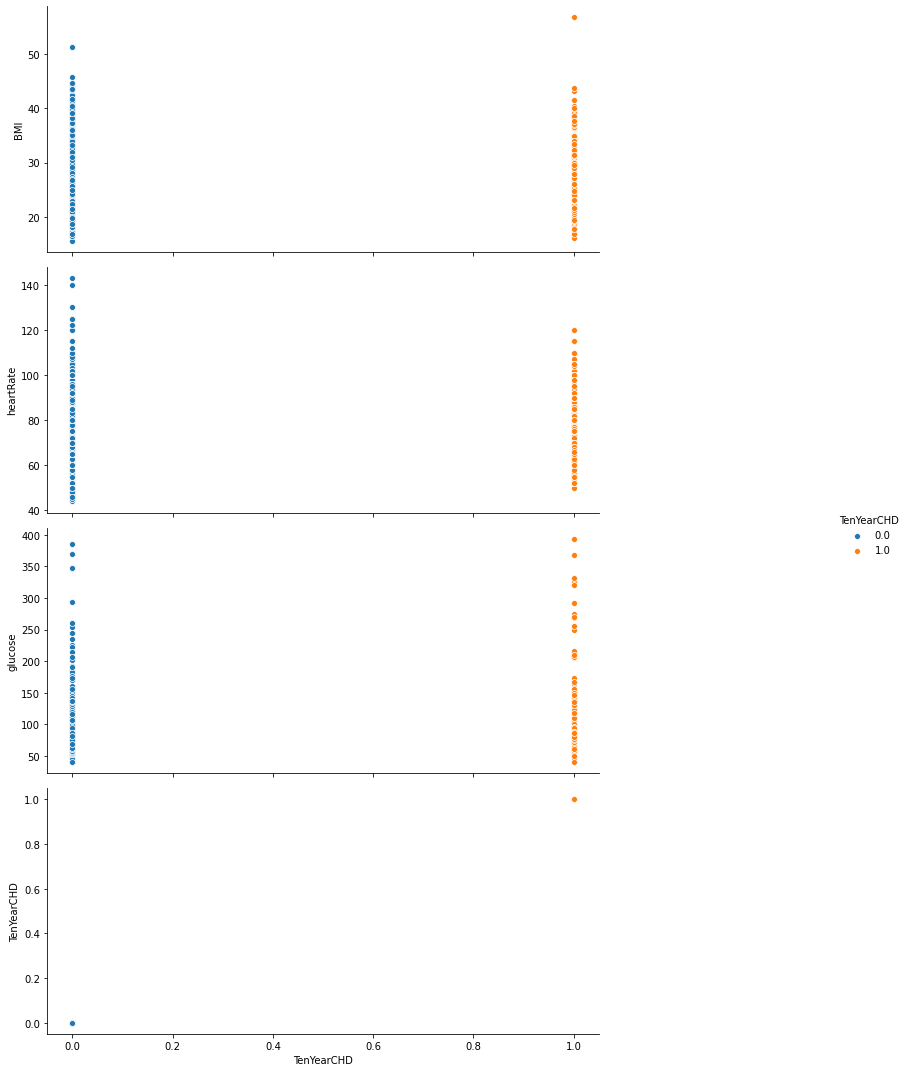

In [9]:
g = sns.pairplot(DfX5, y_vars = DfX5.columns,x_vars ='TenYearCHD', hue = 'TenYearCHD', kind = 'scatter')
g.fig.set_size_inches(15,15)

In [10]:
normalized_data=(df-df.min())/(df.max()-df.min())
#normalized_data = df

In [11]:
normalized_data.drop(['TenYearCHD'], axis = 1, inplace = True)
normalized_data.head()
normalized_data = np.asarray(normalized_data)
Y = np.asarray(DfY)
Y = np.reshape(Y,(len(Y),1))

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(normalized_data, Y, test_size=0.1, random_state=42)

In [13]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(3290, 15) (3290, 1) (366, 15) (366, 1)


In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [15]:
def Cost_function(Y_true, Y_predicted):
    N,_ = Y_predicted.shape
    Cost1 = Y_true*np.log(sigmoid(Y_predicted))
    Cost2 = (1-Y_true)*np.log(1-sigmoid(Y_predicted))
    Cost = (Cost1 + Cost2)/N
    return Cost

In [16]:
def Gradient_calculator(X, Y, W, b,a):
    n_samples, features = X.shape
    y_predicted = sigmoid(np.dot(X,W) + b)
    dw = (1 / n_samples) * np.dot(X.T, (y_predicted - Y))
    db = (1 / n_samples) * np.sum(y_predicted - Y)
    W-= a*dw
    b-= a*db
    return W,b 

In [17]:
def Logistic_Regression(X,Y,a,iterations):
    n_samples, features = X.shape
    #Y = np.reshape(Y, (n_samples,1))
    print(Y.shape)
    W = np.zeros((features,1))
    b = 0
    for i in range(iterations):
        W,b = Gradient_calculator(X,Y,W,b,a)
        if i %1000 == 0:
            Y_predicted = np.dot(X,W) + b
            print(np.sum(Cost_function(Y, Y_predicted)))
            a = a/1.01
    Y_predicted = sigmoid(np.dot(X,W) + b)
    loss = np.sum(Cost_function(Y, Y_predicted))
    
    return W, b, loss

In [18]:
def predict(X,W,b):
    y = sigmoid(np.dot(X,W)+b)
    y_predicted = [1 if i > 0.161 else 0 for i in y]
    return y_predicted

In [19]:
def Accuracy(y_true, y_predicted):
    count = 0
    for i in range(len(y_predicted)):
        if y_true[i] == y_predicted[i]:
            count+=1
    accuracy = count/len(y_predicted)*100
    return accuracy

In [20]:
iterations = 50000
learning_rate = 0.4
W, b, loss = Logistic_Regression(X_train, Y_train, learning_rate, iterations) 

(3290, 1)
-0.6019393882557421
-0.3822432680109273
-0.37883832419355246
-0.37766501980765266
-0.37709393456568213
-0.37677049193456846
-0.3765678822382361
-0.3764321735570291
-0.37633726445043547
-0.37626899462723606
-0.37621893877671375
-0.3761817295562486
-0.3761537790575188
-0.37613260677467397
-0.3761164562043734
-0.3761040613966611
-0.3760944975841468
-0.37608708198665874
-0.3760813060652086
-0.3760767882524231
-0.37607324041429085
-0.37607044373500365
-0.37606823118778243
-0.3760664746770613
-0.3760650755341533
-0.3760639574445677
-0.3760630611535729
-0.37606234048172266
-0.37606175931158814
-0.3760612892986749
-0.3760609081251313
-0.3760605981622322
-0.3760603454420671
-0.3760601388640905
-0.37605996958076054
-0.3760598305202507
-0.37605971601444943
-0.37605962150811
-0.37605954333075664
-0.37605947851727434
-0.3760594246663864
-0.37605937982870397
-0.3760593424179267
-0.37605931114021907
-0.37605928493789553
-0.3760592629444016
-0.37605924444823624
-0.37605922886396825
-0.376059

In [21]:
Y_pred_train = predict(X_train,W,b)
Y_pred_train = np.reshape(Y_pred_train,(len(Y_pred_train),1))
recall = recall_score(Y_train, Y_pred_train)
print(recall)
# print(Y_train.shape,Y_pred_train.shape)
accuracy = Accuracy(Y_pred_train,Y_train)
print(accuracy)
# print(list(Y_train).count(1))
# print(list(Y_pred_train).count(1))


0.6706586826347305
70.06079027355622


In [22]:
Y_pred_test = predict(X_test,W,b)
Y_pred_test = np.reshape(Y_pred_test,(len(Y_pred_test),1))
recall = recall_score(Y_test, Y_pred_test)
print(recall)
# print(Y_test.shape,Y_pred_test.shape)
accuracy = Accuracy(Y_pred_test,Y_test)
print(accuracy)
# print(list(Y_test).count(1))
# print(list(Y_pred_test).count(1))

0.6428571428571429
69.39890710382514
